# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [17]:
import pandas as pd
import numpy as np

## Regression Model Evaluation

In [18]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [20]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

y_predict_test = lr_model.predict(X_test)
y_predict_train = lr_model.predict(X_train)

## 3. Calculate and print R-squared for both the training and the testing set.

In [21]:
from sklearn.metrics import r2_score
#print(lr_model.score(X_train,y_train))
#print(lr_model.score(X_test,y_test))

print('R-squared for testing set: ',r2_score(y_test,y_predict_test))
print('R-squared for testing set: ',r2_score(y_train,y_predict_train))

R-squared for testing set:  0.6687594935356298
R-squared for testing set:  0.7508856358979673


## 4. Calculate and print mean squared error for both the training and the testing set.

In [22]:
from sklearn.metrics import mean_squared_error

def Mean_squared_error(y_true, y_pred):
    
    """
  This functions calculates mse
  :param y_true: list of real numbers, true values
  :param y_pred: list of real numbers, predicted values
  :return: mean squared error
  """
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp) ** 2

    return error / len(y_true)



print('mean squared error for training set: ',Mean_squared_error(np.array(y_train).reshape(404).tolist(), y_predict_train.reshape(404).tolist()))
print('mean squared error for testing set: ',Mean_squared_error(np.array(y_test).reshape(102).tolist(),y_predict_test.reshape(102).tolist()))

#print('mean squared error for testing set: ',mean_squared_error(y_test,y_predict_test))
#print('mean squared error for trainig set: ',mean_squared_error(y_train,y_predict_train))

mean squared error for training set:  21.641412753226323
mean squared error for testing set:  24.29111947497367


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [23]:
from sklearn.metrics import mean_absolute_error

print('Mean absolute erro for trainig set: ',mean_absolute_error(y_train,y_predict_train))
print('Mean absolute erro for testing set: ',mean_absolute_error(y_test,y_predict_test))

Mean absolute erro for trainig set:  3.3147716267832252
Mean absolute erro for testing set:  3.189091965887854


## Classification Model Evaluation

In [106]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [134]:
from sklearn.linear_model import LogisticRegression
lgr_model = LogisticRegression(solver='liblinear',random_state=42,max_iter=1000)

In [135]:
lgr_model.fit(X_train,np.ravel(y_train))
y_predict_train = lgr_model.predict(X_train)
y_predict_test = lgr_model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [136]:
from sklearn.metrics import accuracy_score

print('Accuracy train set: ',accuracy_score(y_train,y_predict_train))
print('Accuracy test set: ',accuracy_score(y_test,y_predict_test))
 

#print('Accuracy train set: ',lgr_model.score(X_train,y_train))
#print('Accuracy train set: ',lgr_model.score(X_test,y_test))

Accuracy train set:  0.9583333333333334
Accuracy test set:  1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [137]:
from sklearn.metrics import balanced_accuracy_score

print('Balanced accuracy score train set: ',balanced_accuracy_score(y_train,y_predict_train))
print('Balanced accuracy score test set: ',balanced_accuracy_score(y_test,y_predict_test))


Balanced accuracy score train set:  0.9589326662497394
Balanced accuracy score test set:  1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [138]:
from sklearn.metrics import precision_score
print('Precision score train set: ',precision_score(y_train,y_predict_train,average='micro'))
print('Precision score score test set: ',precision_score(y_test,y_predict_test,average='micro'))

Precision score train set:  0.9583333333333334
Precision score score test set:  1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [139]:
from sklearn.metrics import recall_score
print('Recall score train set: ',recall_score(y_train,y_predict_train,average='micro'))
print('Recall score score test set: ',recall_score(y_test,y_predict_test,average='micro'))

Recall score train set:  0.9583333333333334
Recall score score test set:  1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [140]:
from sklearn.metrics import f1_score
print('F1 score train set: ',f1_score(y_train,y_predict_train,average='micro'))
print('F1 score score test set: ',f1_score(y_test,y_predict_test,average='micro'))

F1 score train set:  0.9583333333333334
F1 score score test set:  1.0


## 13. Generate confusion matrices for both the training and the testing set.

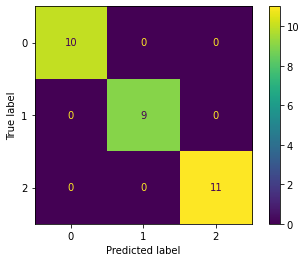

In [141]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lgr_model,X_test,y_test)

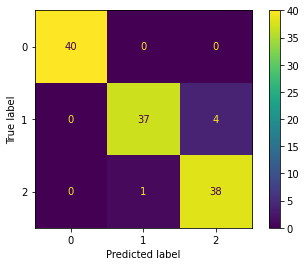

In [142]:
plot_confusion_matrix(lgr_model,X_train,y_train)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


models = [DecisionTreeRegressor(random_state=42),RandomForestRegressor(n_estimators=100, max_depth=4, random_state=0),KNeighborsRegressor(n_neighbors=20,weights='distance'),LinearRegression()]

def classifier_models(X_train,X_test,y_train,y_test,models):
    model_name = ['Decision Tree Regressor','Random Forest Regressor','KNeighborsRegressor','Linear Regression']
    scores_models = []
    train_models = []
    for cls in models:
        model = cls

        training_model = model.fit(X_train,y_train)
        train_models.append(training_model)
    
        score = training_model.score(X_test,y_test)
        scores_models.append(score)

    return dict(zip(model_name,scores_models))

In [150]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])
X_train,X_test,y_train,y_test = train_test_split(np.array(X),np.ravel(y),test_size=0.20,random_state=42)
score_by_model = classifier_models(X_train,X_test,y_train,y_test,models)

print('Prediction score of linear model on boston house data:\n')
for i,(m,s) in enumerate(score_by_model.items()):
    print('-------'*10)
    print('| Model:', m,'|','Score:',s)


Prediction score of linear model on boston house data:

----------------------------------------------------------------------
| Model: Decision Tree Regressor | Score: 0.8579634380978161
----------------------------------------------------------------------
| Model: Random Forest Regressor | Score: 0.8490295006393928
----------------------------------------------------------------------
| Model: KNeighborsRegressor | Score: 0.5398633595468287
----------------------------------------------------------------------
| Model: Linear Regression | Score: 0.6687594935356298
